In [2]:
from sklearn import datasets
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## 1. Load Dataset

Load numerical dataset

In [3]:
iris = datasets.load_iris()

In [6]:
#dataset explanation
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [12]:
print(len(iris['data']))
print(len(iris['target']))

150
150


In [13]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [14]:
iris.target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## 2. Exploratory Data Analysis

Gaussian Naive Bayes expresses likelihood using Gaussian:

$$\large p(x_{i}|y) = \large\frac{1}{\sqrt{2\pi\sigma_{y}^{2}}} exp(-\frac{(x_{i} - \mu_{y}^{2})}{2\sigma_{y}^{2}})$$

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16, 5)

In [18]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
from collections import Counter

In [20]:
# count each group, there are three groups : 0, 1, 2
Counter(iris.target)

Counter({0: 50, 1: 50, 2: 50})

### 2.1 Group 0

In [21]:
group_0 = iris.data[:50]

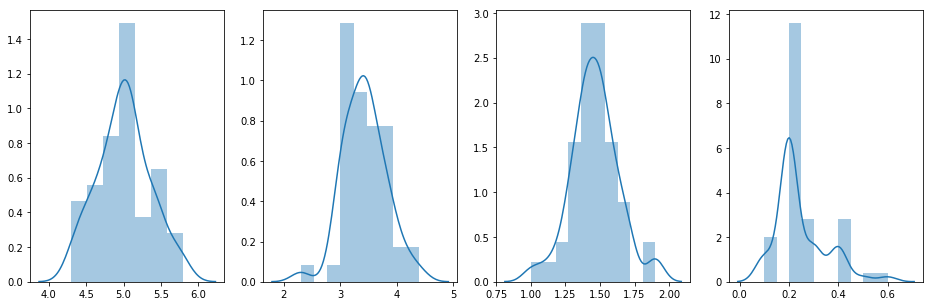

In [22]:
# first feature
plt.subplot(1,4,1)
sns.distplot(group_0[:, 0])

# second feature
plt.subplot(1,4,2)
sns.distplot(group_0[:, 1])

# third feature
plt.subplot(1,4,3)
sns.distplot(group_0[:, 2])

# fourth feature
plt.subplot(1,4,4)
sns.distplot(group_0[:, 3])

### 2.1 Group 1

In [23]:
group_1 = iris.data[50:100]

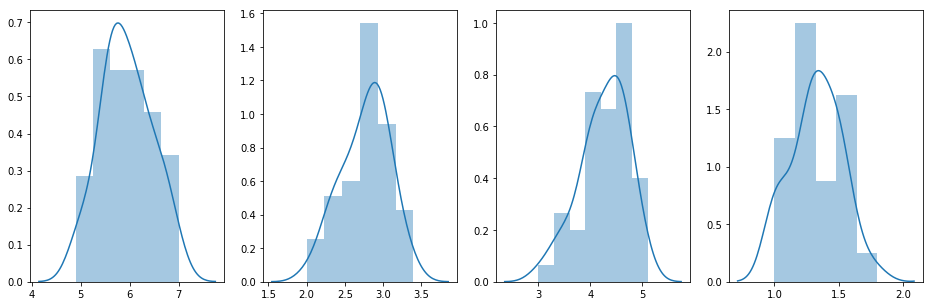

In [24]:
# first feature
plt.subplot(1,4,1)
sns.distplot(group_1[:, 0])

# second feature
plt.subplot(1,4,2)
sns.distplot(group_1[:, 1])

# third feature
plt.subplot(1,4,3)
sns.distplot(group_1[:, 2])

# fourth feature
plt.subplot(1,4,4)
sns.distplot(group_1[:, 3])

### 2.1 Group 2

In [25]:
group_2 = iris.data[100:]

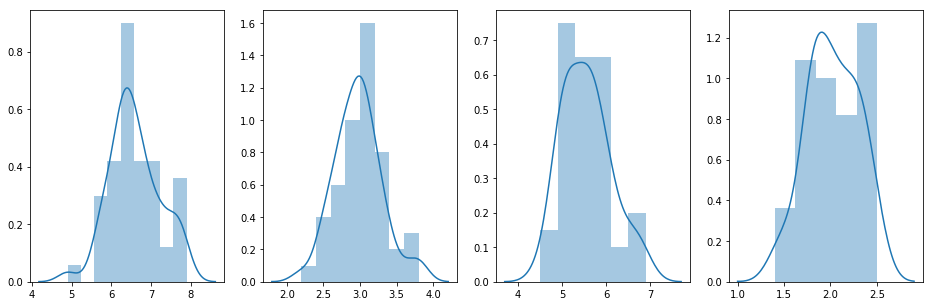

In [26]:
# first feature
plt.subplot(1,4,1)
sns.distplot(group_2[:, 0])

# second feature
plt.subplot(1,4,2)
sns.distplot(group_2[:, 1])

# third feature
plt.subplot(1,4,3)
sns.distplot(group_2[:, 2])

# fourth feature
plt.subplot(1,4,4)
sns.distplot(group_2[:, 3])

## 3. Split Train/Test Data

In [27]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

In [28]:
print('Train x', train_x[:1])
print('Train y', train_y[:1])

Train x [[5.5 2.4 3.7 1. ]]
Train y [1]


In [29]:
from collections import Counter

In [31]:
print('original data :', Counter(iris.target))
print('training data :', Counter(train_y))
print('test data :', Counter(test_y))

original data : Counter({0: 50, 1: 50, 2: 50})
training data : Counter({1: 37, 2: 37, 0: 31})
test data : Counter({0: 19, 1: 13, 2: 13})


## 4. Train Data

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

# scale training data
scaler = scaler.fit(train_x)
scaled_train_x = scaler.transform(train_x)

#transform test dataset
scaled_test_x = scaler.transform(test_x)

In [34]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [35]:
gnb_model = gnb.fit(scaled_train_x, train_y)

## 5. Test Model

In [36]:
pred = gnb_model.predict(scaled_test_x)
print("Accuracy :", (pred == test_y).sum() / len(test_x))

Accuracy : 0.9777777777777777
